In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from myvars import input_features
from sklearn.preprocessing import PowerTransformer
from myclasses import  Windsorizer
from myfuncs import num_describe, generate_features

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
data = pd.read_csv('../data/processed/data.csv')
data = data.dropna()

In [14]:
features = generate_features(data)
features = features.drop(columns = ['symbol', 'calendarYear', 'filingDate'])
num_describe(features)

,sparsity,kurtosis,skewness,mean,std,min,1%,2%,50%,98%,99%,max
target,0.00000,157.63569,10.12457,46.62559,105.26671,0.03671,1.62420,2.42751,19.71238,284.53229,421.12987,2522.28195
totalAssets,0.00000,93.71414,8.79566,69.57932,224.41889,0.00101,1.56715,2.01576,19.40494,507.20174,1012.30930,3762.92451
revenue,0.00000,45.93839,5.67677,25.20244,47.40079,0.00623,1.01491,1.24057,10.82765,165.30953,232.34255,608.97914
revenueYoY,0.08308,319.48129,13.26968,0.05887,0.28907,-0.88958,-0.42616,-0.31244,0.02564,0.60352,0.86627,8.79990
revenueYoYSMA3,0.08308,412.02371,15.55774,0.06760,0.26128,-0.84111,-0.22765,-0.17797,0.02945,0.52583,0.75535,8.79990
previousMarketCap,0.00000,114.60146,8.40866,43.46319,90.64327,0.03671,1.63575,2.45116,18.49762,278.75479,398.70160,2104.10094
cashAndCashEquivalentsToAssets,0.00148,5530.46369,72.51337,0.36399,17.86458,0.00000,0.00100,0.00178,0.05666,0.35829,0.41582,1419.52193
shortTermInvestmentsToAssets,0.54638,6593.05416,79.59220,0.08003,1.87868,-0.02532,0.00000,0.00000,0.00000,0.45334,0.58768,157.11544
netReceivablesToAssets,0.03528,7424.10585,86.15492,0.28489,14.92764,0.00000,0.00000,0.00000,0.08214,0.42803,0.52422,1286.45112
inventoryToAssets,0.28087,8.21203,2.50029,0.07390,0.10650,0.00000,0.00000,0.00000,0.03009,0.40986,0.49809,0.80847


In [15]:
log_transformer = PowerTransformer()
features_transformed = features.copy()
features_transformed.loc[:,:] = log_transformer.fit_transform(features_transformed)
num_describe(features_transformed)

,sparsity,kurtosis,skewness,mean,std,min,1%,2%,50%,98%,99%,max
target,0.00000,0.24804,-0.00944,-0.00000,1.00007,-3.95526,-2.50822,-2.13446,-0.03057,2.05030,2.28538,3.17476
totalAssets,0.00000,-0.30472,0.02886,-0.00000,1.00007,-3.53100,-2.18676,-1.98149,0.00592,2.01650,2.30217,2.74658
revenue,0.00000,-0.35332,0.03090,-0.00000,1.00007,-3.23381,-2.13908,-1.98579,0.00712,2.00681,2.18963,2.64079
revenueYoY,0.00000,14.17778,-0.77473,0.00000,1.00007,-9.01102,-3.42886,-2.39648,-0.03560,2.24443,2.91626,7.84378
revenueYoYSMA3,0.00000,24.73779,-1.19848,-0.00000,1.00007,-15.91128,-2.69152,-2.08014,-0.08758,2.36804,2.99289,5.91827
previousMarketCap,0.00000,0.28623,-0.01088,0.00000,1.00007,-4.05511,-2.52778,-2.13514,-0.04383,2.07993,2.29062,3.10227
cashAndCashEquivalentsToAssets,0.00000,-1.02431,0.34531,-0.00000,1.00007,-1.46250,-1.43253,-1.40934,-0.12250,1.97621,2.06838,2.30325
shortTermInvestmentsToAssets,0.00000,-0.31525,1.16450,-0.00000,1.00007,-2.17366,-0.66195,-0.66195,-0.66195,2.11457,2.11835,2.11943
netReceivablesToAssets,0.00000,-0.67900,0.21474,-0.00000,1.00007,-1.71363,-1.71363,-1.71363,-0.01446,2.14911,2.30140,2.59862
inventoryToAssets,0.00000,-1.21599,0.46057,-0.00000,1.00007,-1.04837,-1.04837,-1.04837,-0.26986,1.91603,1.96259,2.01047


In [4]:
clipper = Windsorizer()
features = clipper.fit_transform(features)
features['target'] = data.target
num_describe(features)

,sparsity,kurtosis,skewness,mean,std,min,1%,2%,50%,98%,99%,max
totalAssets,0.00000,27.36424,5.01167,63.35634,152.90512,1.29636,1.29711,1.78045,18.97032,639.16789,1077.11828,1077.89215
revenue,0.00000,13.30519,3.41850,23.51555,37.21123,0.88918,0.88985,1.17754,10.66688,160.62432,232.25207,232.37929
revenueYoY,0.07103,6.17617,1.47157,0.05258,0.17165,-0.42502,-0.42454,-0.30862,0.02932,0.60301,0.84724,0.84786
revenueYoYSMA3,0.07103,7.47619,2.13447,0.05979,0.13508,-0.21642,-0.21637,-0.16325,0.03274,0.49730,0.72716,0.72718
cashAndCashEquivalentsToAssets,0.00000,2.85436,1.69577,0.08094,0.08503,0.00084,0.00085,0.00157,0.05174,0.34587,0.41006,0.41012
shortTermInvestmentsToAssets,0.56920,9.35447,3.03093,0.04366,0.10015,0.00000,0.00000,0.00000,0.00000,0.42701,0.52898,0.52947
netReceivablesToAssets,0.03777,4.54160,1.83994,0.10773,0.09615,0.00000,0.00000,0.00000,0.08626,0.42875,0.52594,0.52599
inventoryToAssets,0.28371,4.55162,2.05101,0.07274,0.09990,0.00000,0.00000,0.00000,0.03025,0.41096,0.49556,0.49560
otherCurrentAssetsToAssets,0.05403,10.22787,2.43126,0.06464,0.16979,-0.50320,-0.50270,-0.10213,0.02713,0.73142,0.84587,0.84695
propertyPlantEquipmentNetToAssets,0.04700,-0.13366,0.99647,0.25901,0.25175,0.00000,0.00000,0.00000,0.16619,0.87744,0.91692,0.91699


In [5]:
features.dtypes

totalAssets                                                         float64
revenue                                                             float64
revenueYoY                                                          float64
revenueYoYSMA3                                                      float64
cashAndCashEquivalentsToAssets                                      float64
shortTermInvestmentsToAssets                                        float64
netReceivablesToAssets                                              float64
inventoryToAssets                                                   float64
otherCurrentAssetsToAssets                                          float64
propertyPlantEquipmentNetToAssets                                   float64
intangibleAssetsToAssets                                            float64
longTermInvestmentsToAssets                                         float64
otherNonCurrentAssetsToAssets                                       float64
accountPayab

## Correlations

<AxesSubplot:>

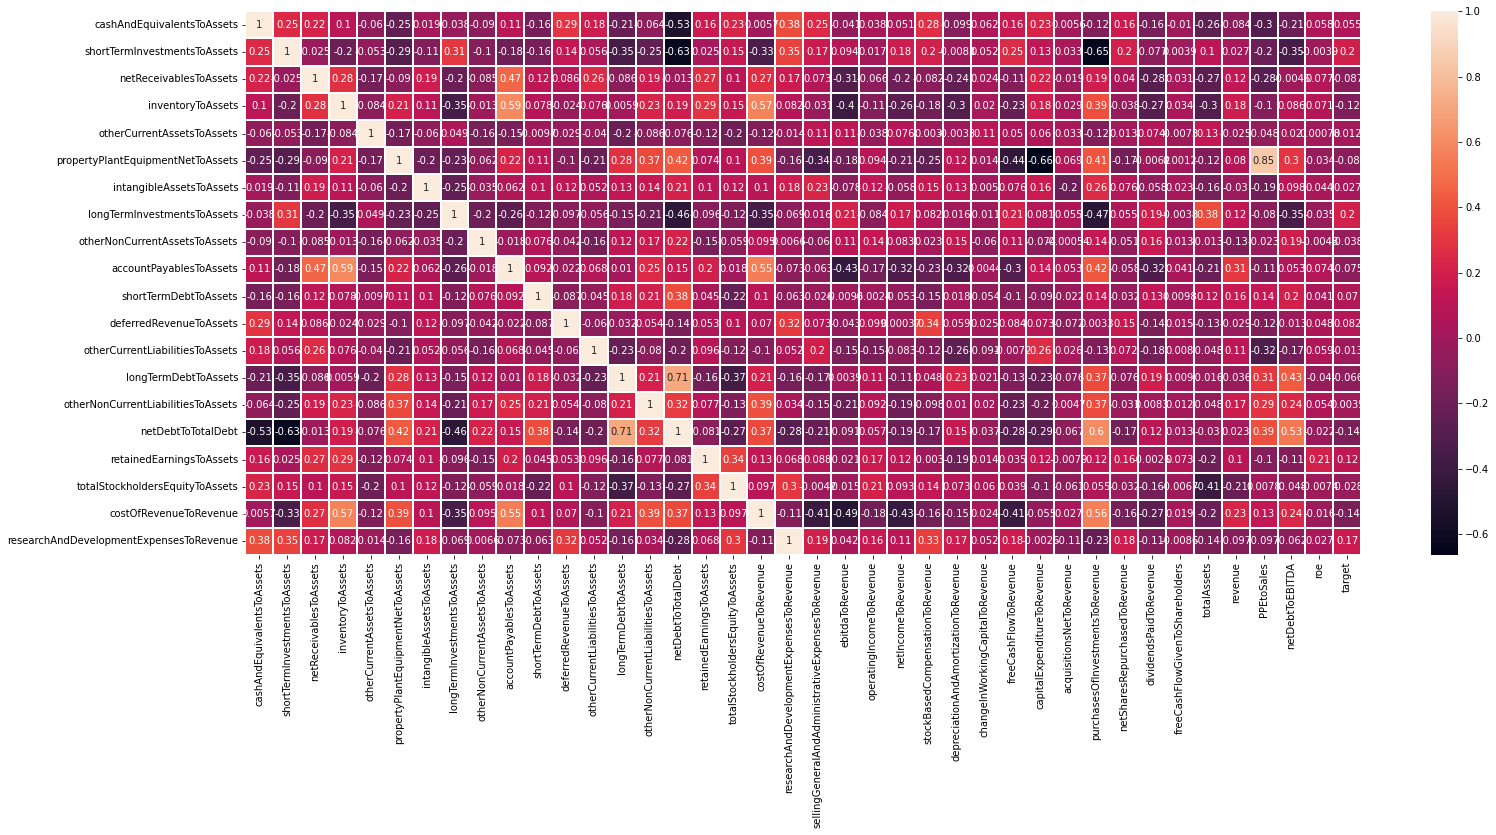

In [17]:
fig, ax = plt.subplots(1,1,figsize=(25,10))
sns.heatmap(
    features.corr()[:20],
    linewidths=0.1,
    annot=True)


<AxesSubplot:>

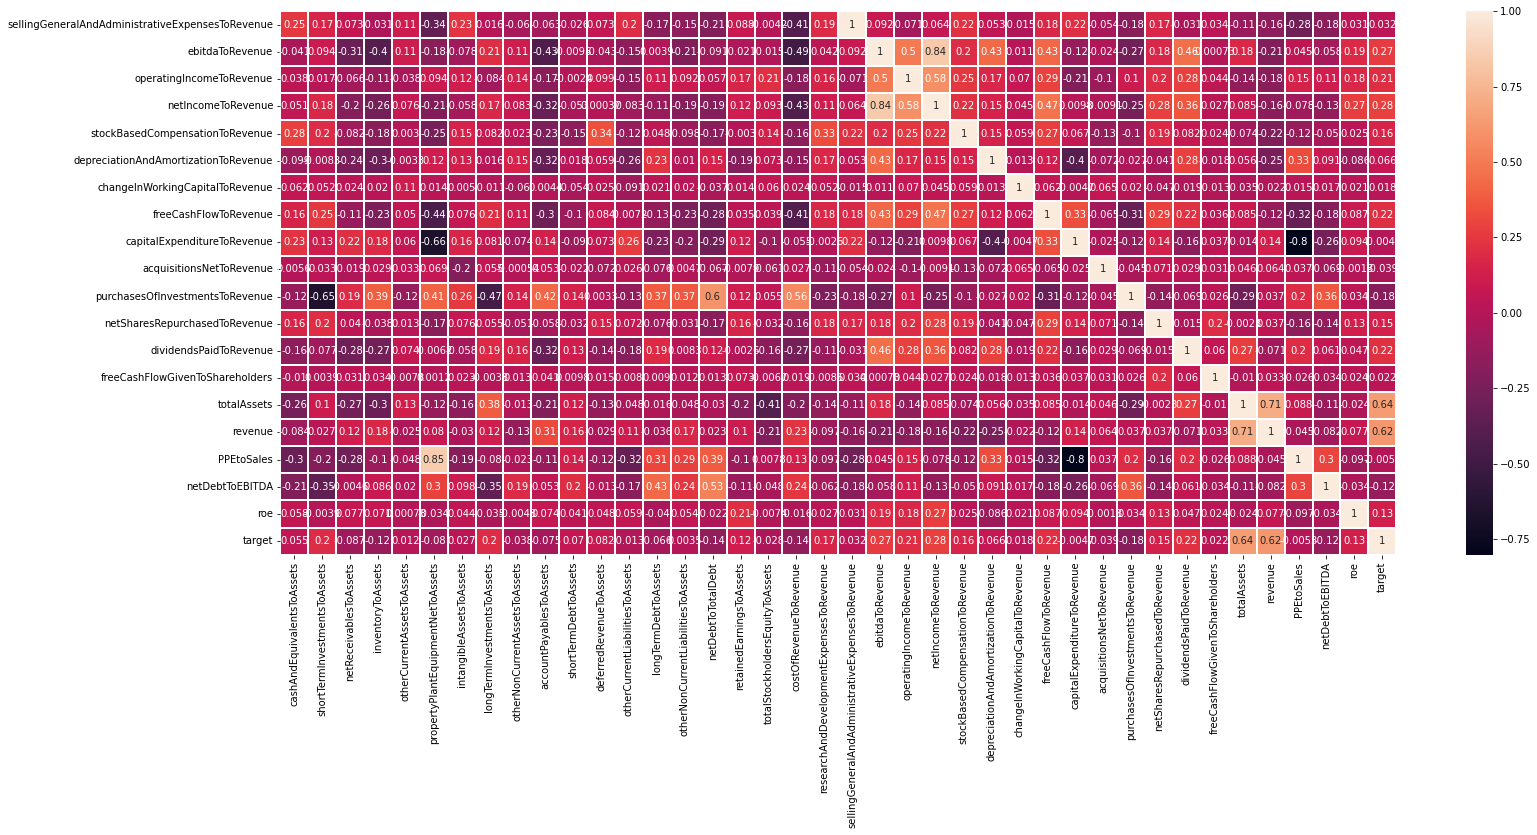

In [18]:
fig, ax = plt.subplots(1,1,figsize=(25,10))
sns.heatmap(
    features.corr()[20:],
    linewidths=0.1,
    annot=True)


In [19]:
sparsity = (features == 0).sum()/features.shape[0]
sparsity.sort_values(ascending=False)

cashAndEquivalentsToAssets                          0.0
shortTermInvestmentsToAssets                        0.0
operatingIncomeToRevenue                            0.0
netIncomeToRevenue                                  0.0
stockBasedCompensationToRevenue                     0.0
depreciationAndAmortizationToRevenue                0.0
changeInWorkingCapitalToRevenue                     0.0
freeCashFlowToRevenue                               0.0
capitalExpenditureToRevenue                         0.0
acquisitionsNetToRevenue                            0.0
purchasesOfInvestmentsToRevenue                     0.0
netSharesRepurchasedToRevenue                       0.0
dividendsPaidToRevenue                              0.0
freeCashFlowGivenToShareholders                     0.0
totalAssets                                         0.0
revenue                                             0.0
PPEtoSales                                          0.0
netDebtToEBITDA                                 

In [20]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()